In [1]:
# Install necessary libraries
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install tikzplotlib
!pip install grape
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (set

In [2]:
# basics
import numpy as np
import pandas as pd
import tensorflow as tf

# math
from math import ceil
from math import log
from math import log10

# utils
import itertools as it
import time
#from varname import nameof # get the name of a variable
import pickle
from tqdm.auto import tqdm, trange
#from tqdm import tqdm  RuntimeError: CUDA error: device-side assert triggered
import inspect
from grape.datasets.linqs import get_words_data # words information is excluded
from sklearn.preprocessing import LabelEncoder


# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import tikzplotlib
#from barplots import barplots
import matplotlib.colors as colors
import seaborn as sns
from sklearn.manifold import TSNE


# torch geometrics
import torch
import torch.optim as optim

from torch_geometric.datasets import FB15k_237
from torch_geometric.nn import ComplEx, DistMult, RotatE, TransE
from torch_geometric.data import Data

import os.path as osp

# Convolutional GNN
import torch_geometric.transforms as T

from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.transforms import RandomLinkSplit

from sklearn.metrics import roc_auc_score
# # Grape

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# # Grape
# from grape.datasets import get_all_available_graphs_dataframe
# from grape.datasets import get_dataset
from grape import Graph
from grape import GraphVisualizer

# # Ensmallen
# from grape.embedders import Node2VecCBOWEnsmallen, Node2VecGloVeEnsmallen, Node2VecSkipGramEnsmallen
# from grape.embedders import DeepWalkCBOWEnsmallen, DeepWalkGloVeEnsmallen, DeepWalkSkipGramEnsmallen
# from grape.embedders import WalkletsSkipGramEnsmallen, WalkletsCBOWEnsmallen, WalkletsGloVeEnsmallen
# from grape.embedders import FirstOrderLINEEnsmallen, SecondOrderLINEEnsmallen
# #from grape.embedders import NetMFEnsmallen, GLEEEnsmallen, HOPEEnsmallen
from grape.embedders import TransEEnsmallen

# # TensorFlow
# from grape.embedders import SkipGramTensorFlow, CBOWTensorFlow
# from grape.embedders import FirstOrderLINETensorFlow, SecondOrderLINETensorFlow

# # KarateClub
# from grape.embedders import Role2VecKarateClub, GraRepKarateClub
# from grape.embedders import NMFADMMKarateClub, RandNEKarateClub


# # Edge prediction evaluation
from grape.edge_prediction import edge_prediction_evaluation
from grape.edge_prediction import DecisionTreeEdgePrediction, RandomForestEdgePrediction, ExtraTreesEdgePrediction, MLPEdgePrediction, GradientBoostingEdgePrediction,PerceptronEdgePrediction

# from grape.edge_prediction import KipfGCNEdgePrediction

# # Node Label prediction evaluation
# from grape.node_label_prediction import node_label_prediction_evaluation
# from grape.node_label_prediction import DecisionTreeNodeLabelPrediction, RandomForestNodeLabelPrediction, MLPNodeLabelPrediction, GradientBoostingNodeLabelPrediction#, PerceptronNodeLabelPrediction

In [4]:
from google.colab import files
uploaded = files.upload()


Saving view5_LP_dismult.csv to view5_LP_dismult.csv
Saving view4_LP_dismult.csv to view4_LP_dismult.csv
Saving view1_LP_dismult.csv to view1_LP_dismult.csv


In [5]:
import os
os.listdir()


['.config',
 'view1_LP_dismult.csv',
 'view5_LP_dismult.csv',
 'view4_LP_dismult.csv',
 'sample_data']

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import glob

# Modify the search pattern to match your file names
keyword = "/content/drive/MyDrive/models_thesis/mayank/LP_VIEWS/view[145]_LP_dismult*.csv"
sorted(glob.glob(keyword, recursive=True))





['/content/drive/MyDrive/models_thesis/mayank/LP_VIEWS/view1_LP_dismult.csv',
 '/content/drive/MyDrive/models_thesis/mayank/LP_VIEWS/view4_LP_dismult.csv',
 '/content/drive/MyDrive/models_thesis/mayank/LP_VIEWS/view5_LP_dismult.csv']

In [8]:
list_results = []

files = glob.glob(keyword, recursive=True)
for filename in files :
    filename_df=pd.read_csv(filename)
    list_results.append(filename_df)

#results_cora_words_s = pd.concat(list_results)
results_VIEWS= pd.concat(list_results)

In [9]:
results_VIEWS

,Unnamed: 0,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,diagnostic_odds_ratio,negative_predictive_value,f1_score,threat_score,matthews_correlation_coefficient,...,"('model_parameters', 'max_features')","('model_parameters', 'max_leaf_nodes')","('model_parameters', 'min_impurity_decrease')","('model_parameters', 'bootstrap')","('model_parameters', 'oob_score')","('model_parameters', 'n_jobs')","('model_parameters', 'verbose')","('model_parameters', 'warm_start')","('model_parameters', 'ccp_alpha')","('model_parameters', 'max_samples')"
0,0,train,0.800001,1.0,True,0.908966,0.477154,0.655768,0.487838,-0.009559,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
1,1,test,0.800001,1.0,True,1.097090,0.522258,0.659047,0.491477,0.008915,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
2,2,train,0.800001,1.0,True,0.908419,0.477005,0.655812,0.487887,-0.009597,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
3,3,test,0.800001,1.0,True,1.073431,0.517038,0.658917,0.491332,0.006760,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
4,4,train,0.800001,1.0,True,0.903460,0.475656,0.656172,0.488285,-0.009952,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
5,5,test,0.800001,1.0,True,1.067007,0.515610,0.659033,0.491461,0.006117,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
6,6,train,0.800001,1.0,True,0.904845,0.476057,0.655822,0.487899,-0.009963,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
7,7,test,0.800001,1.0,True,1.075126,0.517411,0.658866,0.491275,0.006940,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
8,8,train,0.800001,1.0,True,0.913710,0.478389,0.655943,0.488032,-0.008997,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN
9,9,test,0.800001,1.0,True,1.075916,0.517579,0.658784,0.491184,0.007048,...,sqrt,NaN,0.0,True,False,-1,False,False,0.0,NaN


In [10]:
print(results_VIEWS.columns)

Index(['Unnamed: 0', 'evaluation_mode', 'train_size',
       'validation_unbalance_rate', 'use_scale_free_distribution',
       'diagnostic_odds_ratio', 'negative_predictive_value', 'f1_score',
       'threat_score', 'matthews_correlation_coefficient',
       'fowlkes_mallows_index', 'markedness', 'miss_rate', 'informedness',
       'accuracy', 'recall', 'fall_out', 'prevalence_threshold',
       'false_discovery_rate', 'prevalence', 'positive_likelyhood_ratio',
       'negative_likelyhood_ratio', 'balanced_accuracy', 'precision',
       'false_omission_rate', 'specificity', 'auroc', 'auprc',
       'time_required_for_training', 'time_required_for_evaluation', 'time',
       'task_name', 'model_name', 'library_name', 'graph_name', 'nodes_number',
       'edges_number', 'evaluation_schema', 'holdout_number',
       'holdouts_kwargs', 'use_subgraph_as_support', 'node_feature_shapes',
       'node_type_feature_shapes', 'edge_type_feature_shapes',
       'number_of_threads', 'python_versio

In [11]:
#results = results_clustered_grid_s
#results = results_large_grid_s
#results= results_cora_s
results= results_VIEWS

group_features = [ 'graph_name',#,object
                  #'features_names',
                  'model_name',
                  #('features_parameters', 'embedding_size'),
                  #('features_parameters', 'return_weight'), # p
                  #('features_parameters', 'explore_weight'), # q
                  #('features_parameters', 'change_node_type_weight'),# "s"
                  'evaluation_mode',
                'holdout_number'
                  ]

group_metrics = [
                'auroc',
                'auprc',
                'f1_score',
                'matthews_correlation_coefficient',
                'accuracy',
                'precision',
                'recall'
                # 'time'
                ]

group_functions = ['mean',
                   #'std',
                   #'count'
                  ]

group_results=results.groupby(group_features)[group_metrics].agg(group_functions)

group_results

auroc  \
                                                                            mean   
graph_name     model_name               evaluation_mode holdout_number             
VIEW1_directed Random Forest Classifier test            0               0.946072   
                                                        1               0.945807   
                                                        2               0.947023   
                                                        3               0.945109   
                                                        4               0.945095   
                                        train           0               0.935040   
                                                        1               0.935478   
                                                        2               0.937776   
                                                        3               0.935786   
                                                        4               0.935873   
VIEW4_directed Random Forest Classifier test            0               0.920675   
                                                        1               0.923709   
                                                        2               0.921258   
                                                        3               0.920110   
                                                        4               0.921784   
                                        train           0               0.905911   
                                                        1               0.912485   
                                                        2               0.909678   
                                                        3               0.908709   
                                                        4               0.908340   
VIEW5_directed Random Forest Classifier test            0               0.919699   
                                                        1               0.918398   
                                                        2               0.916666   
                                                        3               0.920590   
                                                        4               0.921399   
                                        train           0               0.907985   
                                                        1               0.905154   
                                                        2               0.904875   
                                                        3               0.905920   
                                                        4               0.908740   

                                                                           auprc  \
                                                                            mean   
graph_name     model_name               evaluation_mode holdout_number             
VIEW1_directed Random Forest Classifier test            0               0.947986   
                                                        1               0.945562   
                                                        2               0.946902   
                                                        3               0.945551   
                                                        4               0.945113   
                                        train           0               0.935150   
                                                        1               0.936058   
                                                        2               0.938291   
                                                        3               0.936189   
                                                        4               0.936403   
VIEW4_directed Random Forest Classifier test            0               0.921962   
                                                        1               0.924143   
                                          

In [12]:
group_results.to_csv('results_VIEWS_Node2vec_p_4_q_0.25.csv')

In [13]:
def barplots(data, groupby, height, bar_width, show_legend, legend_position, ncol, orientation, min_value, max_value, show_last_level_as_legend):
    import matplotlib.pyplot as plt

    # Sample implementation; you'll need to replace this with your actual logic
    grouped = data.groupby(groupby).agg('mean')  # Example aggregation
    ax = grouped.plot(kind='bar', width=bar_width)
    ax.set_ylim(min_value, max_value)
    plt.legend(loc=legend_position, ncol=ncol)
    plt.show()


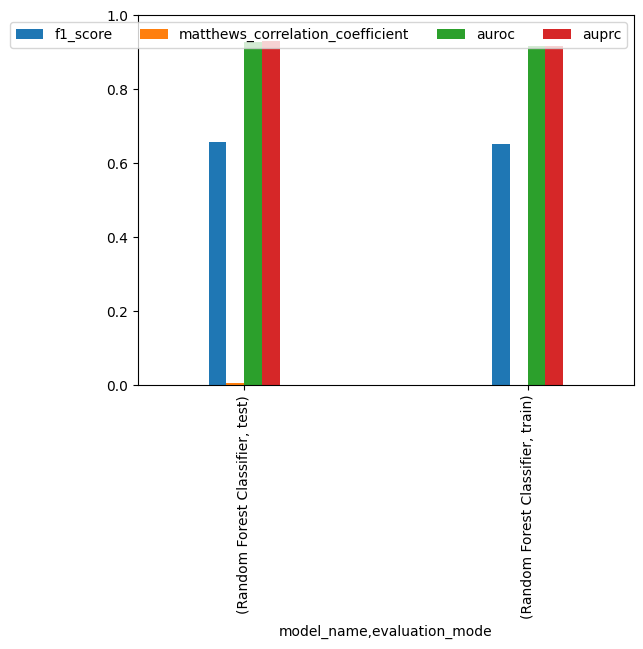

In [14]:
data=results

data=data.reset_index() # RESET INDEX

# DATA TYPES
#data[('features_parameters', 'change_node_type_weight')] = pd.to_numeric(data[('features_parameters', 'change_node_type_weight')], errors='coerce')
#data=data.sort_values(('features_parameters', 'change_node_type_weight'))



index = [# 'graph_name',
        #'features_names',
        'model_name',
        'evaluation_mode',
        #('features_parameters', 'embedding_size'),
        #('features_parameters', 'change_node_type_weight'),# "s"
        #('features_parameters', 'return_weight'), # p
        #('features_parameters', 'explore_weight'), # q
        #'evaluation_mode',
         ]

# FUNCTIONS
metrics = [
        "f1_score",
        "matthews_correlation_coefficient",
        "auroc",
        "auprc"]

# FORMATTING
# results2[('features_parameters', 'change_node_type_weight')] = [
#     f"{s}"
#     for s in results2[('features_parameters', 'change_node_type_weight')]
# ]

_ = barplots(
    data[[*index, *metrics]],
    groupby=index,
    height=2,
    bar_width=.25,
    #unique_minor_labels=False,
    #unique_major_labels=False,
    show_legend=False,
    legend_position="best",
    #subplots=True,
    ncol=15,
    orientation='horizontal',
    #scale='log',
    min_value=0.0,
    max_value=1,
    show_last_level_as_legend=True,
    #show_title=False,
    #major_rotation=True,
    #minor_rotation=90,
)
plt.show()

# tikzplotlib.save("test.tex")
# plt.close()
# mpl.rcParams.update(mpl.rcParamsDefault)

prediction

In [ ]:
# Load graph
view=2
view_name='VIEW'+str(view)
results = pd.DataFrame()

# Load graph
view_path='/content/drive/MyDrive/VIEW'+str(view)+"/"

nodes_df = pd.read_pickle(view_path+"nodes.pkl")
edges_df = pd.read_pickle(view_path+"edges.pkl")

In [ ]:
rna_kg_graph = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=False,
    name=view_name,
)

rna_kg_graph_directed = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=True,
    name=view_name+"_directed",
)

In [ ]:
train, test = rna_kg_graph.get_node_label_holdout_graphs( train_size=0.8,
                                                    random_state=4567 )

In [ ]:
model = RandomForestEdgePrediction()
#model = MLPEdgePrediction()

# DecisionTreeEdgePrediction,
# RandomForestEdgePrediction,
# ExtraTreesEdgePrediction,
# MLPEdgePrediction,
# GradientBoostingEdgePrediction,
# PerceptronEdgePrediction

model.fit(
    graph=train,
    node_features=embedding
)